# Raudhatul Jannah
# PYTN-KS19-09
# Python for Data Science by Hacktiv8
# **Final Projects 1 - Linear Regression**

## **Perkenalan (Business and Data Understanding)** 👋🏼
<hr>
Bab pengenalan harus diisi dengan latar belakang memilih kasus, data yang digunakan (jumlah data, kelas, sumber), dan objective yang ingin dicapai.

**Outline Notebook**
1. Perkenalan
2. Import Libraries
3. Data Loading
4. Data Cleaning
5. Explorasi Data
6. Data Preprocessing
7. Pendefinisian Model
8. Pelatihan Model
9. Evaluasi Model
10. Model Inference
11. Pengambilan Kesimpulan


**Project Overview**

Dataset yang dipakai bernama <b>Uber and Lyft Dataset Boston, MA</b>. Dataset ini berisi kumpulan data informasi tentang perjalanan rideshare yang dilakukan di Boston, Massachusetts, Amerika Serikat. Dataset ini terdiri dari 693071 baris dan 57 kolom, tetapi yang paling relevan ada 10 atribut dari semuanya.

**Attribute Information:**
1. id 
2. timestamp 
3. hour 
4. day 
5. month
6. datetime 
7. timezone 
8. source: destinasi awal 
9. destination: destinasi akhir 
10. cab_type: tipe transportasi (uber / lyft) 
11. … dan lainnya

**Objektif**
Final Project 1 ini dibuat guna mengevaluasi konsep Regression sebagai berikut: 
* Mampu memahami konsep regression dengan Linear Regression.
* Mampu mempersiapkan data untuk digunakan dalam model Linear Regression. 
* Mampu mengimplementasikan Linear Regression untuk membuat prediksi.


**Dataset Link** : https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma/data

## **Import Libraries**
<hr>
Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project

In [1]:
# Import library yang dibutuhkan
# Data cleaning and manipulation 
import pandas as pd
import numpy as np
from scipy import stats


# Data Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Modelling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Ignore Warning
import warnings
warnings.filterwarnings('ignore')

## **Data Loading**
<hr>
Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan explorasi data secara sederhana.

In [2]:
# Membaca dataset dengan library pandas
df = pd.read_csv('rideshare_kaggle.csv')

# Menampilkan data teratas dan tail
df 

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [3]:
# Melihat jumlah baris dan kolom pada dataset
df.shape

(693071, 57)

In [4]:
# Cara lain untuk melihat baris dan kolom
print("Baris : ", df.shape[0])
print("Kolom : ", df.shape[1])

Baris :  693071
Kolom :  57


In [5]:
# Melihat informasi datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [6]:
# Memeriksa jumlah missing value 
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

## **Data Cleaning**
<hr>
Bagian ini berisi proses penyiapan data berupa data cleaning sebelum dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa memberi nama baru untuk setiap kolom, mengisi missing values, menghapus kolom yang tidak dipakai, dan lain sebagainya.

In [7]:
# Menampilkan 5 data teratas
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [8]:
# menampilkan apakah di setiap attribute ada missing value dengan tampilan boolean (true/false)
df.isna().any()

id                             False
timestamp                      False
hour                           False
day                            False
month                          False
datetime                       False
timezone                       False
source                         False
destination                    False
cab_type                       False
product_id                     False
name                           False
price                           True
distance                       False
surge_multiplier               False
latitude                       False
longitude                      False
temperature                    False
apparentTemperature            False
short_summary                  False
long_summary                   False
precipIntensity                False
precipProbability              False
humidity                       False
windSpeed                      False
windGust                       False
windGustTime                   False
v

In [9]:
# Memeriksa jumlah missing value pada dataset 
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [10]:
# Menghitung persentase missing value dalam setiap kolom
df.isna().sum() /len(df) *100

id                             0.000000
timestamp                      0.000000
hour                           0.000000
day                            0.000000
month                          0.000000
datetime                       0.000000
timezone                       0.000000
source                         0.000000
destination                    0.000000
cab_type                       0.000000
product_id                     0.000000
name                           0.000000
price                          7.949402
distance                       0.000000
surge_multiplier               0.000000
latitude                       0.000000
longitude                      0.000000
temperature                    0.000000
apparentTemperature            0.000000
short_summary                  0.000000
long_summary                   0.000000
precipIntensity                0.000000
precipProbability              0.000000
humidity                       0.000000
windSpeed                      0.000000


Dapat dilihat pada data di atas, diketahui bahwa `terdapat banyak nilai null pada kolom price` sebesar 55095 dan fitur price merupakan variable yang bergantung pada projek yang akan dibuat, jika memaksa mengisi nilai null pada fitur price akan mengakibatkan lebih banyak nilai yang error dan akurasi yang kurang. Jadi akan `dihapus semua record dimana kolom price memiliki nilai null`.

In [11]:
# Menghapus missing value pada kolom price
df = df.dropna(subset=['price']).reset_index()

In [12]:
# Memeriksa jumlah missing value pada dataset 
df.isnull().sum()

index                          0
id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatur

In [13]:
# Melihat duplikasi data
df.duplicated().sum()

0

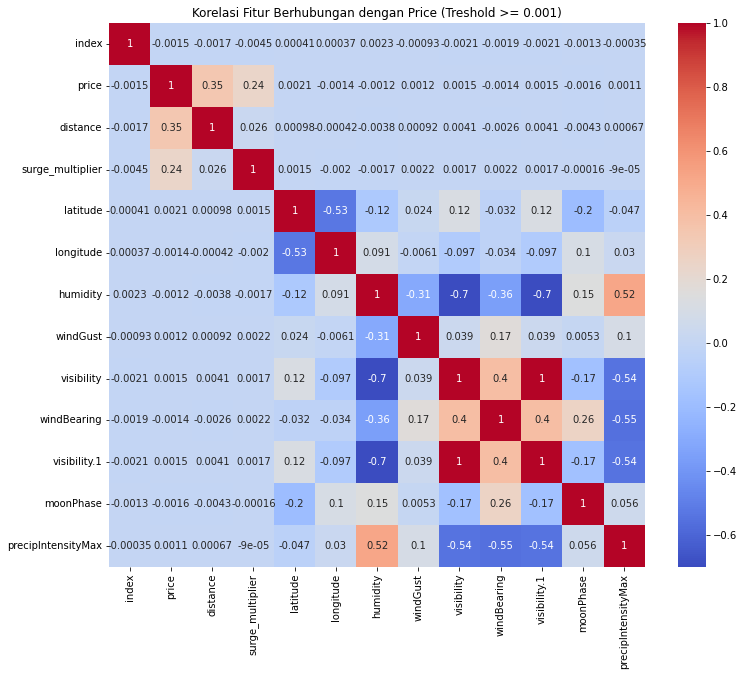

In [14]:
# Membuat matriks korelasi
correlation_matrix = df.corr()

# Memilih fitur yang memiliki korelasi dengan 'price' di atas atau sama dengan ambang 0.001
threshold = 0.001 
relevant_features = correlation_matrix[correlation_matrix['price'].abs() >= threshold].index

# Subset dataset ke fitur yang relevan
subset_df = df[relevant_features]

# Membuat heatmap korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(subset_df.corr(), annot=True, cmap="coolwarm")
plt.title('Korelasi Fitur Berhubungan dengan Price (Treshold >= 0.001)')
plt.show()


In [15]:
# Menghapus fitur yang tidak memiliki hubungan terhadap prediksi (price)
# sudah ada atribut jarak dan parameter waktu
df = df.drop(['id','timestamp','datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
            'windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime','temperatureMaxTime',
            'apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime','latitude','longitude'],
            axis=1)
print(df.shape)
df.head()

(637976, 41)


,index,hour,day,month,timezone,source,destination,cab_type,product_id,name,...,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,0,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,...,0.72,0,10.000,303.8,0.30,0.1276,39.89,43.68,33.73,38.07
1,1,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,...,1.00,0,4.786,291.1,0.64,0.1300,40.49,47.30,36.20,43.92
2,2,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,...,0.03,0,10.000,315.7,0.68,0.1064,35.36,47.55,31.04,44.12
3,3,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,...,0.00,0,10.000,291.1,0.75,0.0000,34.67,45.03,30.30,38.53
4,4,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,...,0.44,0,10.000,347.7,0.72,0.0001,33.10,42.18,29.11,35.75


Dikarenakan tujuan kita adalah membuat model regresi linier. Maka, kita memeriksa korelasi antara fitur yang ada dengan dan target (price)

In [16]:
# Memeriksa korelasi berhubungan antara fitur price dan fitur yang memiliki relasi dengan temperature
temp_cols = df[['price','temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
            'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin',
            'apparentTemperatureMax']]
temp_cols.head()

,price,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,5.0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,1544968800,43.68,33.73,38.07
1,11.0,43.58,37.35,47.30,42.10,43.92,36.20,40.49,1543251600,47.30,36.20,43.92
2,7.0,38.33,32.93,47.55,33.10,44.12,29.11,35.36,1543320000,47.55,31.04,44.12
3,26.0,34.38,29.63,45.03,28.90,38.53,26.20,34.67,1543510800,45.03,30.30,38.53
4,9.0,37.44,30.88,42.18,36.71,35.75,30.29,33.10,1543420800,42.18,29.11,35.75


<AxesSubplot: >

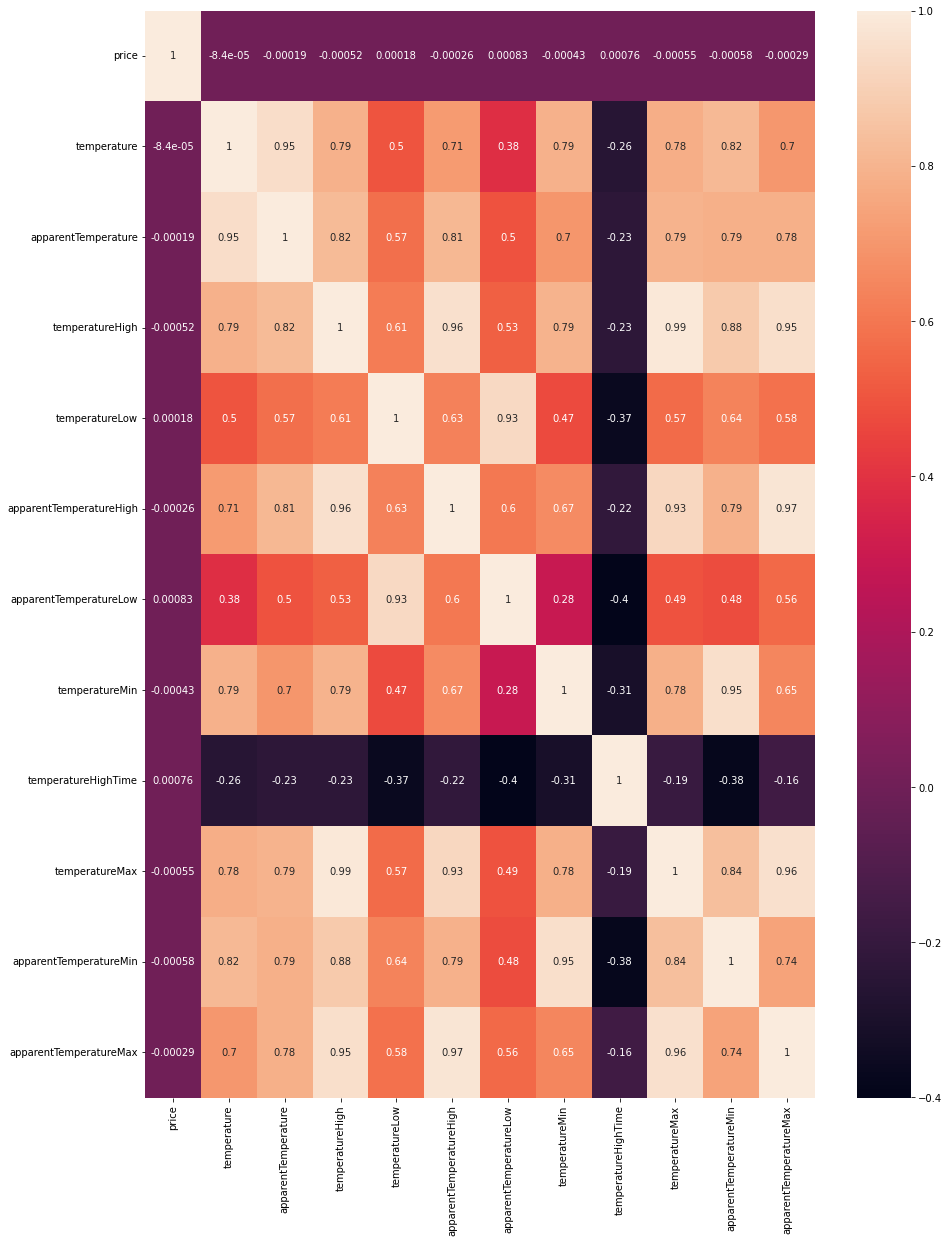

In [17]:
# Menampilkan visualisasi price dengan fitur yang berhubungan dengan temperatur
plt.figure(figsize=(15,20))
sns.heatmap(temp_cols.corr(),annot=True)

Dapat dilihat pada visualisasi di atas bahwa semua fitur yang berhubungan dengan suhu memmiliki korelasi yang lemah dengan target (price). maka dari itu kita akan menghapus semua fitur tersebut.

In [18]:
# Menghapus semua fitur yang berhubungan dengan temperatur dari dataframe karena mereka memiliki korelasi yang lemah terhadap fitur target (price)
new_df = df[['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
            'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin',
            'apparentTemperatureMax']]
df = df.drop(new_df.columns, axis=1)
print(df.shape)
df.head()

(637976, 30)


,index,hour,day,month,timezone,source,destination,cab_type,product_id,name,...,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
0,0,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,...,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,0.30,0.1276
1,1,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,...,rain,41.83,1003.97,90,1.00,0,4.786,291.1,0.64,0.1300
2,2,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,...,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,0.68,0.1064
3,3,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,...,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,0.75,0.0000
4,4,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,...,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,0.72,0.0001


In [19]:
# Memeriksa korelasi berhubungan antara fitur price dan fitur yang memiliki relasi dengan climate
climate_cols = df[['price','precipIntensity','precipProbability','humidity','windSpeed','windGust',
                'visibility','dewPoint','pressure','windBearing','cloudCover','uvIndex','visibility.1',
                'ozone','moonPhase','precipIntensityMax',]]
climate_cols.head()

,price,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
0,5.0,0.0000,0.0,0.68,8.66,9.17,10.000,32.70,1021.98,57,0.72,0,10.000,303.8,0.30,0.1276
1,11.0,0.1299,1.0,0.94,11.98,11.98,4.786,41.83,1003.97,90,1.00,0,4.786,291.1,0.64,0.1300
2,7.0,0.0000,0.0,0.75,7.33,7.33,10.000,31.10,992.28,240,0.03,0,10.000,315.7,0.68,0.1064
3,26.0,0.0000,0.0,0.73,5.28,5.28,10.000,26.64,1013.73,310,0.00,0,10.000,291.1,0.75,0.0000
4,9.0,0.0000,0.0,0.70,9.14,9.14,10.000,28.61,998.36,303,0.44,0,10.000,347.7,0.72,0.0001


<AxesSubplot: >

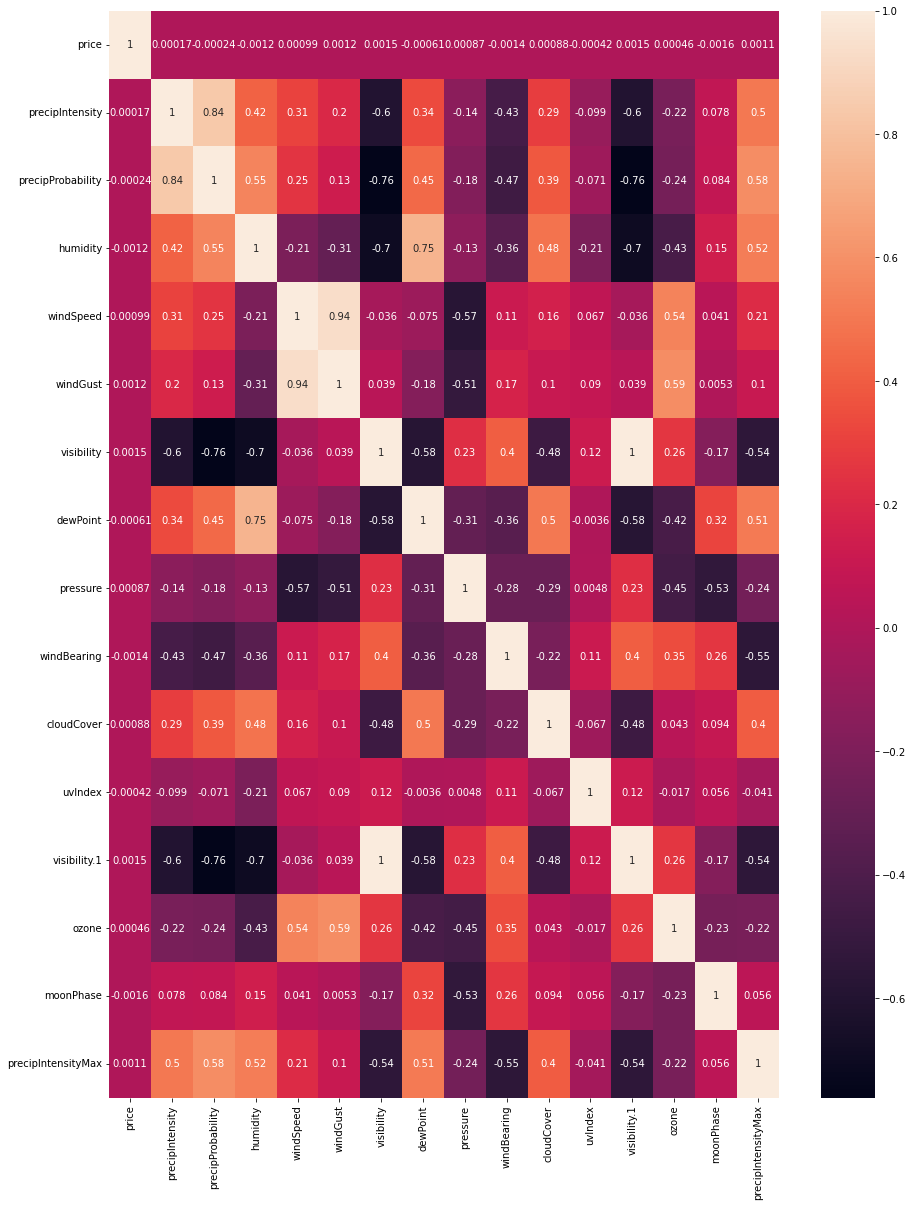

In [20]:
# Menampilkan visualisasi price dengan fitur yang berhubungan dengan climate
plt.figure(figsize=(15, 20))
sns.heatmap(climate_cols.corr(), annot=True)

Dapat dilihat ternyata semua fitur yang berhubungan dengan iklim (climate) juga memiliki korelasi yang lemah dengan fitur target (price), Maka dari itu kita akan menghapusnya.

In [21]:
# Menghapus semua fitur yang berhubungan dengan climate dari dataframe karena mereka memiliki korelasi yang lemah terhadap fitur target (price)
climate_cols = ['precipIntensity','precipProbability','humidity','windSpeed','windGust',
                'visibility','dewPoint','pressure','windBearing','cloudCover','uvIndex','visibility.1',
                'ozone','moonPhase','precipIntensityMax']
df = df.drop(climate_cols, axis=1)
print(df.shape)
df.head()

(637976, 15)


,index,hour,day,month,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,short_summary,icon
0,0,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,Mostly Cloudy,partly-cloudy-night
1,1,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,Rain,rain
2,2,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,Clear,clear-night
3,3,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,Clear,clear-night
4,4,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,Partly Cloudy,partly-cloudy-night


In [22]:
# Melihat informasi datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637976 entries, 0 to 637975
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             637976 non-null  int64  
 1   hour              637976 non-null  int64  
 2   day               637976 non-null  int64  
 3   month             637976 non-null  int64  
 4   timezone          637976 non-null  object 
 5   source            637976 non-null  object 
 6   destination       637976 non-null  object 
 7   cab_type          637976 non-null  object 
 8   product_id        637976 non-null  object 
 9   name              637976 non-null  object 
 10  price             637976 non-null  float64
 11  distance          637976 non-null  float64
 12  surge_multiplier  637976 non-null  float64
 13  short_summary     637976 non-null  object 
 14  icon              637976 non-null  object 
dtypes: float64(3), int64(4), object(8)
memory usage: 73.0+ MB


In [23]:
# Menampilkan fitur dengan tipe categorical
categorical_cols = df.select_dtypes(include=['object','category']).columns.tolist()
new_data = df[categorical_cols]
new_data.head()

,timezone,source,destination,cab_type,product_id,name,short_summary,icon
0,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,Mostly Cloudy,partly-cloudy-night
1,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,Rain,rain
2,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,Clear,clear-night
3,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,Clear,clear-night
4,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,Partly Cloudy,partly-cloudy-night


In [24]:
# Loop melalui setiap kolom
for kolom in new_data:
    # Menampilkan nilai unik dalam kolom, diurutkan
    unique_val = df[kolom].sort_values().unique()
    print(f"Column: {kolom}")
    print(unique_val)
    print("\n")

Column: timezone
['America/New_York']


Column: source
['Back Bay' 'Beacon Hill' 'Boston University' 'Fenway'
 'Financial District' 'Haymarket Square' 'North End' 'North Station'
 'Northeastern University' 'South Station' 'Theatre District' 'West End']


Column: destination
['Back Bay' 'Beacon Hill' 'Boston University' 'Fenway'
 'Financial District' 'Haymarket Square' 'North End' 'North Station'
 'Northeastern University' 'South Station' 'Theatre District' 'West End']


Column: cab_type
['Lyft' 'Uber']


Column: product_id
['55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '997acbb5-e102-41e1-b155-9df7de0a73f2'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d' 'lyft' 'lyft_line' 'lyft_lux'
 'lyft_luxsuv' 'lyft_plus' 'lyft_premier']


Column: name
['Black' 'Black SUV' 'Lux' 'Lux Black' 'Lux Black XL' 'Lyft' 'Lyft XL'
 'Shared' 'UberPool' 'UberX' 'UberXL' 'WAV']


Column: short_summary
[' 

In [25]:
# Mengambil semua nama kolom dalam DataFrame
columns = new_data.columns

# Looping untuk mendapatkan isi dari setiap kolom
for column in columns:
    value_counts = new_data[column].value_counts()
    print(f"Isi dari kolom '{column}':\n{value_counts}\n")

Isi dari kolom 'timezone':
America/New_York    637976
Name: timezone, dtype: int64

Isi dari kolom 'source':
Financial District         54197
Back Bay                   53201
Theatre District           53201
Boston University          53172
North End                  53171
Fenway                     53166
Northeastern University    53164
South Station              53160
Haymarket Square           53147
West End                   52980
Beacon Hill                52841
North Station              52576
Name: source, dtype: int64

Isi dari kolom 'destination':
Financial District         54192
Back Bay                   53190
Theatre District           53189
Haymarket Square           53171
Boston University          53171
Fenway                     53166
Northeastern University    53165
North End                  53164
South Station              53159
West End                   52992
Beacon Hill                52840
North Station              52577
Name: destination, dtype: int64

Isi dari

In [26]:
# Menghitung jumlah total data dalam setiap kolom
total_counts = len(new_data)
# Mengambil semua nama kolom dalam DataFrame
columns = new_data.columns

# Looping untuk menghitung persentase isi dari setiap kolom
for column in columns:
    value_counts = new_data[column].value_counts()
    percentages = (value_counts / total_counts) * 100
    print(f"Persentase isi kolom '{column}':\n{percentages}\n")

Persentase isi kolom 'timezone':
America/New_York    100.0
Name: timezone, dtype: float64

Persentase isi kolom 'source':
Financial District         8.495147
Back Bay                   8.339028
Theatre District           8.339028
Boston University          8.334483
North End                  8.334326
Fenway                     8.333542
Northeastern University    8.333229
South Station              8.332602
Haymarket Square           8.330564
West End                   8.304388
Beacon Hill                8.282600
North Station              8.241062
Name: source, dtype: float64

Persentase isi kolom 'destination':
Financial District         8.494363
Back Bay                   8.337304
Theatre District           8.337147
Haymarket Square           8.334326
Boston University          8.334326
Fenway                     8.333542
Northeastern University    8.333386
North End                  8.333229
South Station              8.332445
West End                   8.306269
Beacon Hill         

Dapat dilihat bahwa fitur 'timezone' hanya memiliki 1 nilai dan fitur 'product_id' berisi banyak nilai yang tidak teridentifikasi. Sehingga kita dapat menghapus atau membuangnya.

In [27]:
# Menghapus kolom timezone dan product_id 
df = df.drop(['timezone','product_id'], axis=1)
df.head()

,index,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,icon
0,0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,partly-cloudy-night
1,1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain,rain
2,2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear,clear-night
3,3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear,clear-night
4,4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy,partly-cloudy-night


In [28]:
# Menghapus kolom index
df = df.drop(['index'], axis=1)

In [29]:
# Menampilkan fitur dengan tipe numeric
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
new_data = df[num_cols]
new_data.head()

,hour,day,month,price,distance,surge_multiplier
0,9,16,12,5.0,0.44,1.0
1,2,27,11,11.0,0.44,1.0
2,1,28,11,7.0,0.44,1.0
3,4,30,11,26.0,0.44,1.0
4,3,29,11,9.0,0.44,1.0


## **Explorasi Data (EDA)** 
<hr>
Bagian ini berisi explorasi data pada dataset di atas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [30]:
# Mendapatkan daftar kolom dalam dataset
dataset_kolom = df.columns

# Loop melalui setiap kolom
for kolom in dataset_kolom:
    # Menampilkan nilai unik dalam kolom, diurutkan
    unique_val = df[kolom].sort_values().unique()
    print(f"Column: {kolom}")
    print(unique_val)
    print("\n")

Column: hour
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


Column: day
[ 1  2  3  4  9 10 13 14 15 16 17 18 26 27 28 29 30]


Column: month
[11 12]


Column: source
['Back Bay' 'Beacon Hill' 'Boston University' 'Fenway'
 'Financial District' 'Haymarket Square' 'North End' 'North Station'
 'Northeastern University' 'South Station' 'Theatre District' 'West End']


Column: destination
['Back Bay' 'Beacon Hill' 'Boston University' 'Fenway'
 'Financial District' 'Haymarket Square' 'North End' 'North Station'
 'Northeastern University' 'South Station' 'Theatre District' 'West End']




Column: cab_type
['Lyft' 'Uber']


Column: name
['Black' 'Black SUV' 'Lux' 'Lux Black' 'Lux Black XL' 'Lyft' 'Lyft XL'
 'Shared' 'UberPool' 'UberX' 'UberXL' 'WAV']


Column: price
[ 2.5   3.    3.5   4.5   5.    5.5   6.    6.5   7.    7.5   7.98  8.
  8.35  8.5   9.    9.35  9.5  10.   10.5  10.6  11.   11.5  11.6  12.
 12.5  13.   13.5  14.   14.5  15.   15.5  16.   16.5  17.   17.5  18.
 18.35 18.5  19.   19.35 19.5  20.   20.5  21.   21.5  22.   22.5  23.
 23.5  24.   24.5  25.   25.5  26.   26.5  27.   27.5  28.   28.35 28.5
 29.   29.5  30.   30.5  31.   31.5  32.   32.5  33.   33.5  34.   34.5
 35.   35.5  36.   36.5  37.   37.5  37.85 38.   38.5  39.   39.5  40.
 40.5  41.   41.5  42.   42.5  43.   43.5  44.   44.5  45.   45.35 45.5
 46.   46.5  47.   47.5  48.   48.5  49.   49.5  50.5  51.   51.5  52.
 52.5  53.   53.5  54.   54.5  55.   55.5  56.   56.5  57.   57.5  58.
 58.5  59.   59.5  60.5  61.5  62.   62.5  63.   64.   64.5  65.   67.
 67.5  68.   68.5  73.5  75.   76.  

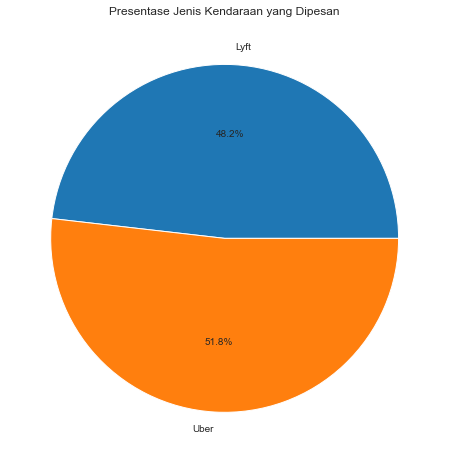

In [31]:
# Menghitung jumlah total kendaraan yang dipesan untuk setiap jenis kendaraan
counts = df.groupby('cab_type')['distance'].count()

# Menghitung presentase dari setiap jenis kendaraan
percentages = counts / counts.sum() * 100

# Menampilkan grafik pie chart
sns.set_style("whitegrid")
plt.figure(figsize=(8, 8))
plt.pie(percentages.values, labels=percentages.index, autopct='%1.1f%%')
plt.title('Presentase Jenis Kendaraan yang Dipesan')
plt.show()

Dari grafik pie di atas diketahui bahwa Uber lebih banyak dipesan dibandingkan dengan Lyft

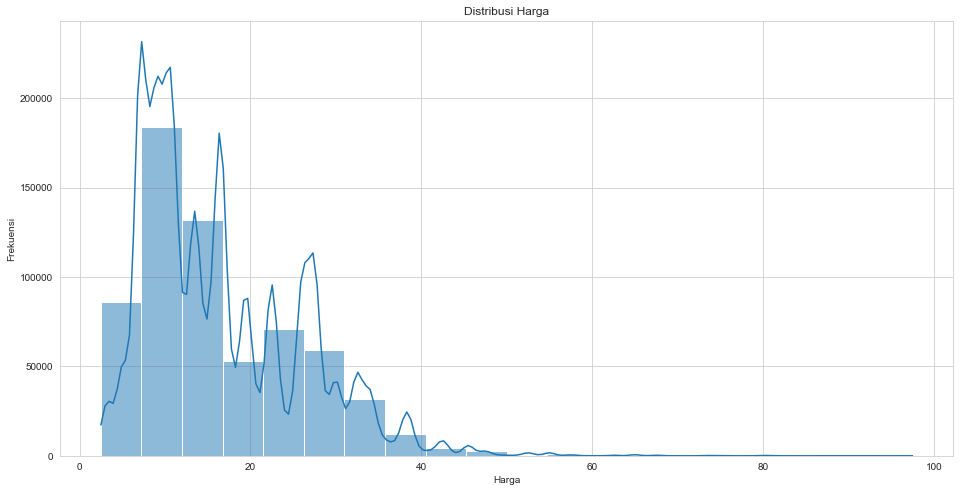

In [32]:
# Mengatur ukuran gambar untuk plot
plt.figure(figsize=(16, 8))
# Membuat histogram distribusi harga menggunakan seaborn
sns.histplot(data=df, x='price', bins=20, kde=True)
# Menambahkan judul plot
plt.title('Distribusi Harga')
# Menambahkan label sumbu x
plt.xlabel('Harga')
# Menambahkan label sumbu y
plt.ylabel('Frekuensi')
# Menampilkan plot histogram
plt.show()

Mencari tahu mengenai central tendency(titik pusat), rata-rata dari pengguna Uber dan Lyft

In [33]:
uber = df[df['cab_type']=='Uber']
lyft = df[df['cab_type']=='Lyft']

#### Uber
Mencari harga tarif Uber dengan membandingkan jarak (distance) dengan harga (price) dari layanan Uber, dengan menggunakan kelipatan surge (surge_multiplier)

Text(0.5, 1.0, 'Uber: Distance - Price')

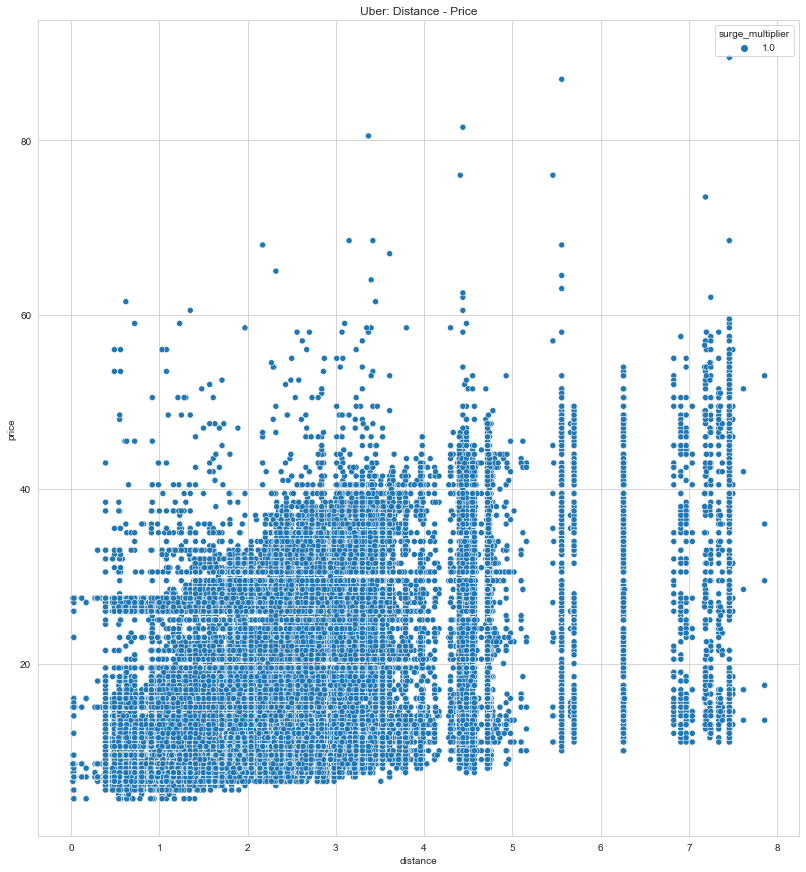

In [34]:
# Menyaring DataFrame sesuai dengan kolom yang Anda perlukan
uber_sm_dis_price = uber[['distance','surge_multiplier','price']]

# Plotting menggunakan scatter plot
plt.figure(figsize=(30,15))
plt.subplot(121)
sns.scatterplot(data = uber_sm_dis_price, x = 'distance', y='price', hue='surge_multiplier')
plt.title('Uber: Distance - Price')

Scatter plot adalah sebuah grafik yang biasa digunakan untuk melihat suatu pola hubungan antara 2 variabel. Dapat diketahui pada visualisasi di atas untuk data uber diketahui bahwa antara hubungan `distance dan price sangatlah kecil atau tidak ada hubungan`, dikarenakan price tidak bertambah secara linier.

Mencari 5 tempat tujuan pengguna Uber yang sering dipesan.

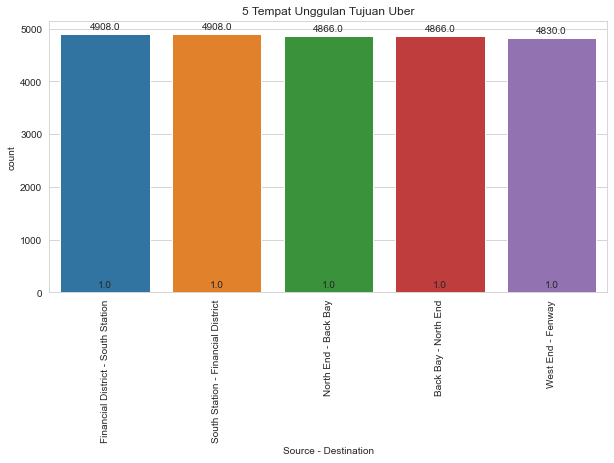

In [35]:
# Menghitung total per kombinasi sumber dan tujuan
uber_top5 = uber.groupby(['source', 'destination']).size().reset_index()
uber_top5.columns = ['source', 'destination', 'total']
uber_top5 = uber_top5.sort_values(by='total', ascending=False).head(5)

# Menggabungkan sumber dan tujuan menjadi satu kolom
uber_top5['Source - Destination'] = uber_top5['source'] + ' - ' + uber_top5['destination']
uber_top5 = uber_top5[['Source - Destination', 'total']]

# Membuat bar plot
plt.figure(figsize=(10, 5))
sns.barplot(data=uber_top5, x='Source - Destination', y='total').set_title("5 Tempat Unggulan Tujuan Uber")
plt.xticks(rotation=90)

# Menampilkan jumlah di atas setiap bar
ax = sns.countplot(x='Source - Destination', data=uber_top5)
for i in ax.patches:
    ax.annotate(format(i.get_height(), '0.1f'), (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='center', xytext=(0, 7), textcoords='offset points')

plt.show()


Dapat diketahui 5 Tempat Tujuan yang paling sering dipesan oleh pengguna Uber, yaitu :
1. Financial District - South Station
2. South Station - Financial District
3. Nort End - Back Bay
4. Back Bay - North End
5. West End - Fenway

#### Lyft
Mencari harga tarif Lyft dengan membandingkan jarak (distance) dengan harga (price) dari layanan Lyft, dengan menggunakan kelipatan surge (surge_multiplier)

Text(0.5, 1.0, 'Lyft: Distance - Price')

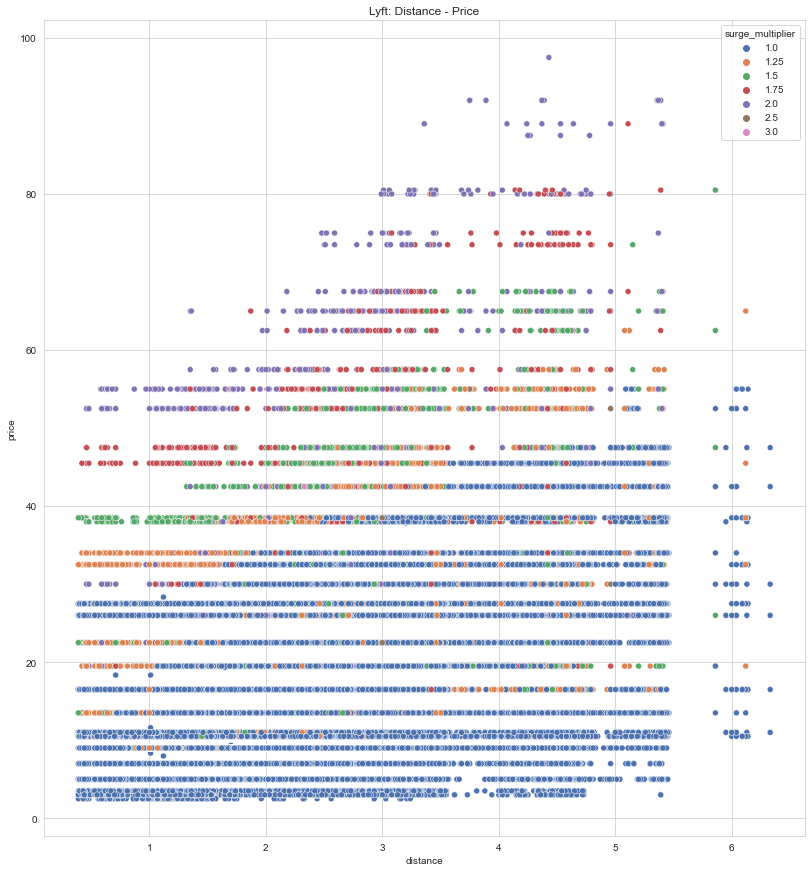

In [36]:
# Menyaring DataFrame sesuai dengan kolom yang Anda perlukan
lyft_sm_dis_price = lyft[['distance','surge_multiplier','price']]

# Plotting menggunakan scatter plot
plt.figure(figsize=(30,15))
plt.subplot(121)
sns.scatterplot(data = lyft_sm_dis_price, x = 'distance', y='price', hue='surge_multiplier', palette='deep')
plt.title('Lyft: Distance - Price')

Scatter plot adalah sebuah grafik yang biasa digunakan untuk melihat suatu pola hubungan antara 2 variabel. Dapat diketahui pada visualisasi di atas untuk data Lyft diketahui bahwa `secara signifikan jika distance bertambah maka price juga ikut bertambah`. Diketahui juga bahwa dengan `harga tertinggi maka lebih banuak juga surge multiplier yang juga bertambah`.

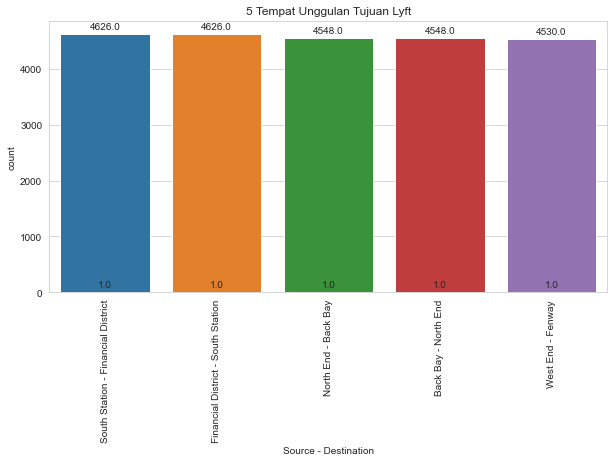

In [37]:
# Menghitung total per kombinasi sumber dan tujuan
lyft_top5 = lyft.groupby(['source', 'destination']).size().reset_index()
lyft_top5.columns = ['source', 'destination', 'total']
lyft_top5 = lyft_top5.sort_values(by='total', ascending=False).head(5)

# Menggabungkan sumber dan tujuan menjadi satu kolom
lyft_top5['Source - Destination'] = lyft_top5['source'] + ' - ' + lyft_top5['destination']
lyft_top5 = lyft_top5[['Source - Destination', 'total']]

# Membuat bar plot
plt.figure(figsize=(10, 5))
sns.barplot(data=lyft_top5, x='Source - Destination', y='total').set_title("5 Tempat Unggulan Tujuan Lyft")
plt.xticks(rotation=90)

# Menampilkan jumlah di atas setiap bar
ax = sns.countplot(x='Source - Destination', data=lyft_top5)
for i in ax.patches:
    ax.annotate(format(i.get_height(), '0.1f'), (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='center', xytext=(0, 7), textcoords='offset points')

plt.show()


Dapat diketahui 5 Tempat Tujuan yang paling sering dipesan oleh pengguna Lyft, yaitu :
1. South Station - Financial District
2. Financial District - South Station
3. Nort End - Back Bay
4. Back Bay - North End
5. West End - Fenway

## **Data Preprocessing** 
<hr>
Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

In [38]:
# Menampilkan 5 data teratas
df.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,icon
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,partly-cloudy-night
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain,rain
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear,clear-night
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear,clear-night
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy,partly-cloudy-night


In [39]:
# Menampilkan informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637976 entries, 0 to 637975
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   hour              637976 non-null  int64  
 1   day               637976 non-null  int64  
 2   month             637976 non-null  int64  
 3   source            637976 non-null  object 
 4   destination       637976 non-null  object 
 5   cab_type          637976 non-null  object 
 6   name              637976 non-null  object 
 7   price             637976 non-null  float64
 8   distance          637976 non-null  float64
 9   surge_multiplier  637976 non-null  float64
 10  short_summary     637976 non-null  object 
 11  icon              637976 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 58.4+ MB


In [40]:
# Melakukan binary encode kolom cab_type
df['cab_type'] = df['cab_type'].replace({'Lyft': 0, 'Uber': 1})

In [41]:
# Mengubah variabel kategorikal menjadi representasi biner yang dapat digunakan dalam analisis data atau pemodelan dengan One-hot Encoding
categorical_cols = df.select_dtypes(include=['object','category']).columns.tolist()

# Menginisiasi OneHotEncoder dan menggabungkan original dataframe dengan kolom encode ke dataframe
for col in categorical_cols:
        encoder = OneHotEncoder(handle_unknown='ignore')
        # Membuat DataFrame baru (encoder_df) dari hasil encoding.
        encoder_df = pd.DataFrame(encoder.fit_transform(df[[col]]).toarray())
        # Memberi nama kolom-kolom yang sudah di-encode
        encoder_df.columns = encoder.get_feature_names_out([col])
        # Menghapus kolom asli dari DataFrame 
        df = df.drop(col, axis=1)
        # Menggabungkan DataFrame asli dengan DataFrame yang di-encode 
        df = pd.concat([df, encoder_df], axis=1)

In [42]:
df.head()

,hour,day,month,cab_type,price,distance,surge_multiplier,source_Back Bay,source_Beacon Hill,source_Boston University,...,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,9,16,12,0,5.0,0.44,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,27,11,0,11.0,0.44,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,28,11,0,7.0,0.44,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,30,11,0,26.0,0.44,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3,29,11,0,9.0,0.44,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [43]:
# Memeriksa korelasi berhubungan antara fitur price dan fitur yang memiliki relasi dengan source
source_cols = df[['price','source_Back Bay', 'source_Beacon Hill', 'source_Boston University','source_Fenway',
                'source_Financial District', 'source_Haymarket Square','source_North End', 'source_North Station',
                'source_Northeastern University', 'source_South Station','source_Theatre District',
                'source_West End']]
source_cols.head()

,price,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End
0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot: >

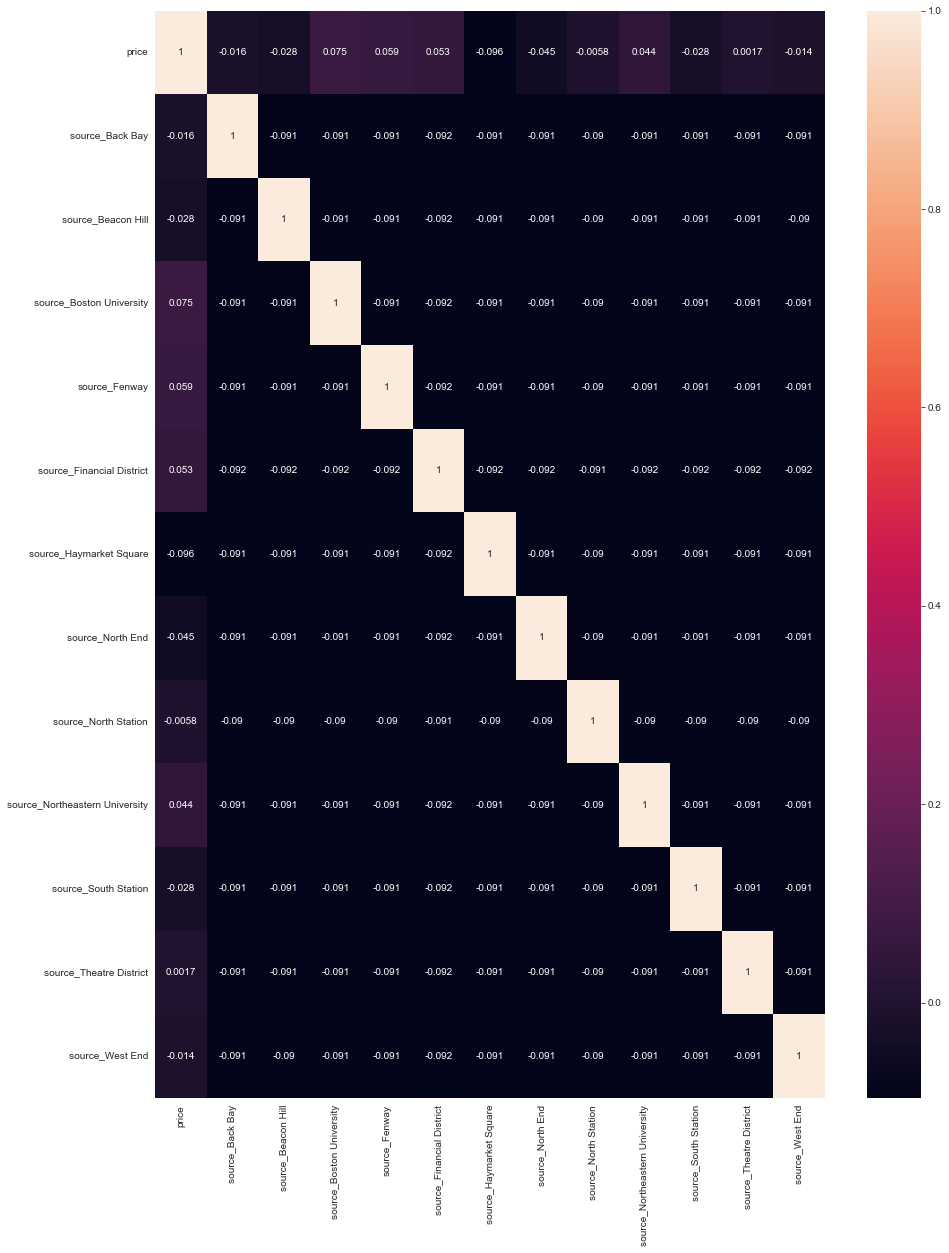

In [44]:
# Menampilkan visualisasi price dengan fitur yang berhubungan dengan source
plt.figure(figsize=(15, 20))
sns.heatmap(source_cols.corr(), annot=True)

In [45]:
# Menghapus semua fitur yang berhubungan dengan source dari dataframe karena mereka memiliki korelasi yang lemah terhadap fitur target (price)
source_cols = ['source_Back Bay', 'source_Beacon Hill', 'source_Boston University','source_Fenway',
                'source_Financial District', 'source_Haymarket Square','source_North End', 'source_North Station',
                'source_Northeastern University', 'source_South Station','source_Theatre District',
                'source_West End']
df = df.drop(source_cols, axis=1)
print(df.shape)
df.head()

(637976, 47)


,hour,day,month,cab_type,price,distance,surge_multiplier,destination_Back Bay,destination_Beacon Hill,destination_Boston University,...,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,9,16,12,0,5.0,0.44,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,27,11,0,11.0,0.44,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,28,11,0,7.0,0.44,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,30,11,0,26.0,0.44,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3,29,11,0,9.0,0.44,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [46]:
# Memeriksa korelasi berhubungan antara fitur price dan fitur yang memiliki relasi dengan destination
destination_cols =df[['price','destination_Back Bay','destination_Beacon Hill', 'destination_Boston University',
                    'destination_Fenway', 'destination_Financial District','destination_Haymarket Square',
                    'destination_North End','destination_North Station', 'destination_Northeastern University',
                    'destination_South Station', 'destination_Theatre District','destination_West End']]
destination_cols.head()

,price,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<AxesSubplot: >

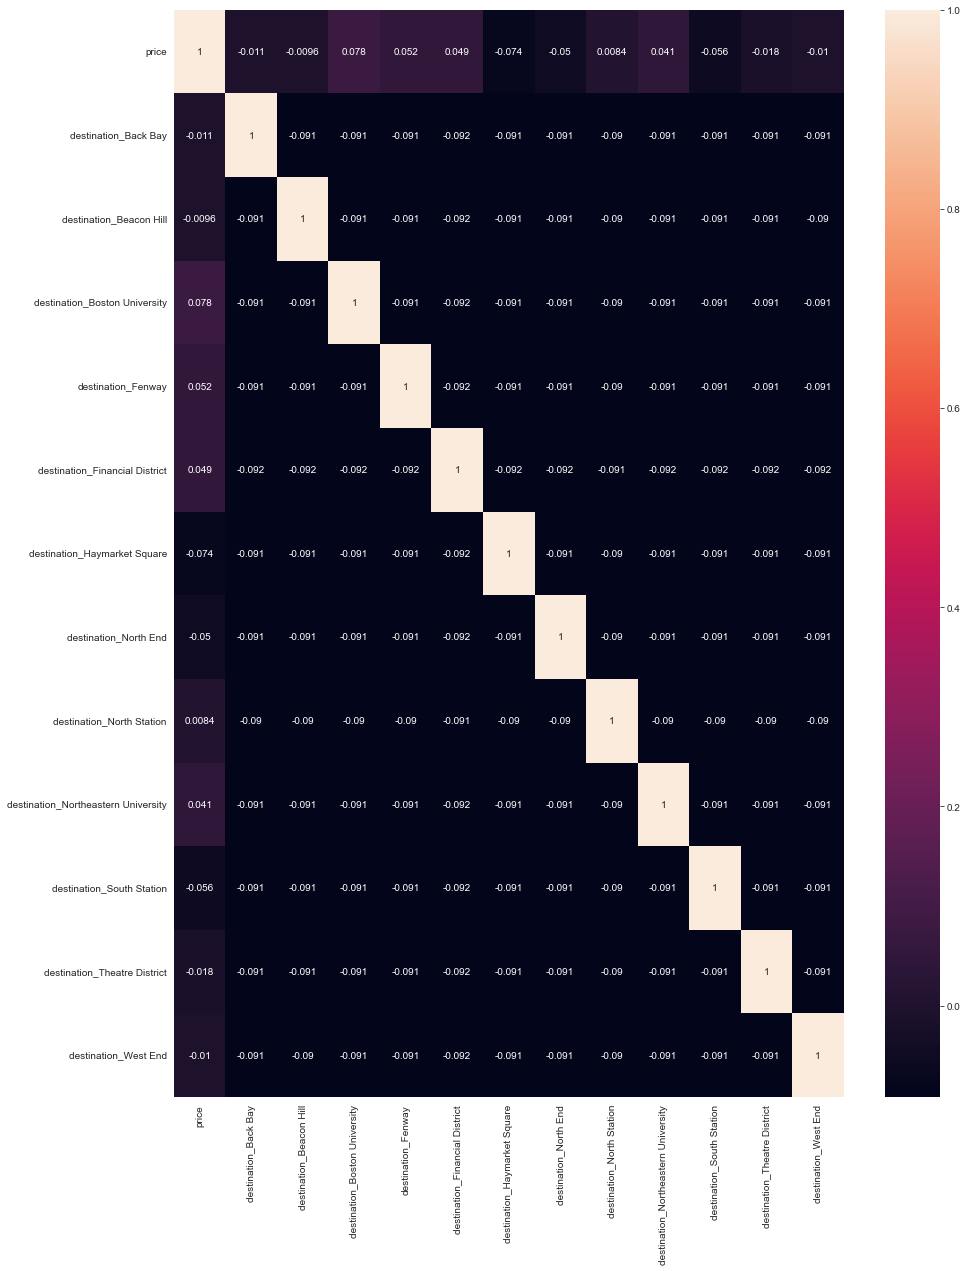

In [47]:
# Menampilkan visualisasi price dengan fitur yang berhubungan dengan destination
plt.figure(figsize=(15, 20))
sns.heatmap(destination_cols.corr(), annot=True)

In [48]:
# Menghapus semua fitur yang berhubungan dengan destination dari dataframe karena mereka memiliki korelasi yang lemah terhadap fitur target (price)
destination_cols =['destination_Back Bay','destination_Beacon Hill', 'destination_Boston University',
                    'destination_Fenway', 'destination_Financial District','destination_Haymarket Square',
                    'destination_North End','destination_North Station', 'destination_Northeastern University',
                    'destination_South Station', 'destination_Theatre District','destination_West End']
df = df.drop(destination_cols, axis=1)
print(df.shape)
df.head()

(637976, 35)


,hour,day,month,cab_type,price,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,...,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,9,16,12,0,5.0,0.44,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,27,11,0,11.0,0.44,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,28,11,0,7.0,0.44,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,30,11,0,26.0,0.44,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3,29,11,0,9.0,0.44,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [49]:
# Memeriksa korelasi berhubungan antara fitur price dan fitur yang memiliki relasi dengan summary
summary_cols = df[['price','short_summary_ Clear ','short_summary_ Drizzle ', 'short_summary_ Foggy ',
                'short_summary_ Light Rain ', 'short_summary_ Mostly Cloudy ','short_summary_ Overcast ',
                'short_summary_ Partly Cloudy ','short_summary_ Possible Drizzle ', 'short_summary_ Rain ']]
summary_cols.head()

,price,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<AxesSubplot: >

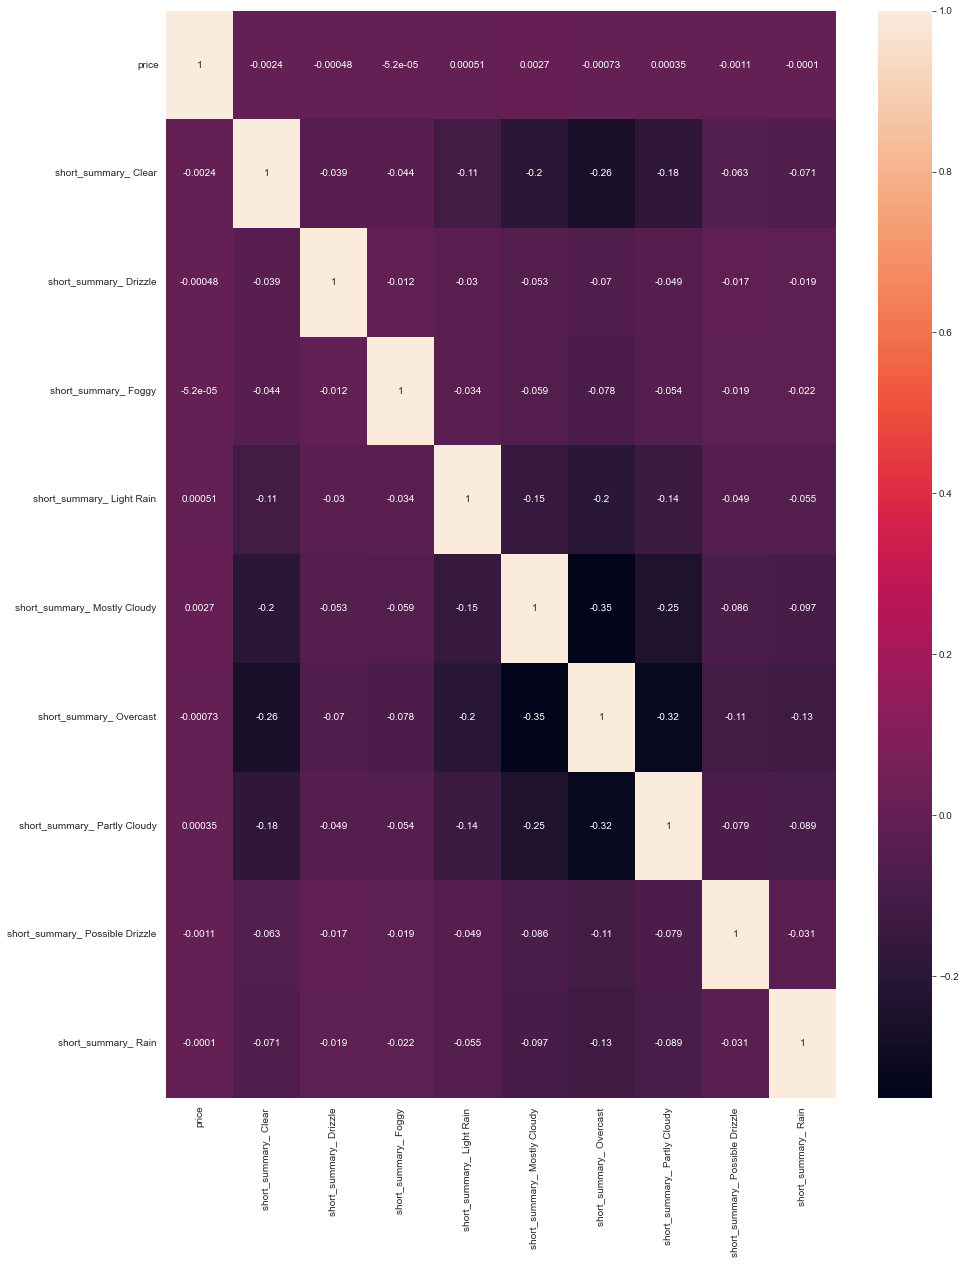

In [50]:
# Menampilkan visualisasi price dengan fitur yang berhubungan dengan summary
plt.figure(figsize=(15, 20))
sns.heatmap(summary_cols.corr(), annot=True)

In [51]:
# Menghapus semua fitur yang berhubungan dengan summary dari dataframe karena mereka memiliki korelasi yang lemah terhadap fitur target (price)
summary_cols = ['short_summary_ Clear ','short_summary_ Drizzle ', 'short_summary_ Foggy ',
                'short_summary_ Light Rain ', 'short_summary_ Mostly Cloudy ','short_summary_ Overcast ',
                'short_summary_ Partly Cloudy ','short_summary_ Possible Drizzle ', 'short_summary_ Rain ']
df = df.drop(summary_cols, axis=1)
print(df.shape)
df.head()

(637976, 26)


,hour,day,month,cab_type,price,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,...,name_UberX,name_UberXL,name_WAV,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,9,16,12,0,5.0,0.44,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,27,11,0,11.0,0.44,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,28,11,0,7.0,0.44,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,30,11,0,26.0,0.44,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3,29,11,0,9.0,0.44,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [52]:
# Memeriksa korelasi berhubungan antara fitur price dan fitur yang memiliki relasi dengan icon
icon_cols = df[['price','icon_ clear-day ', 'icon_ clear-night ', 'icon_ cloudy ', 'icon_ fog ','icon_ partly-cloudy-day ',
            'icon_ partly-cloudy-night ','icon_ rain ']]
icon_cols.head()

,price,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<AxesSubplot: >

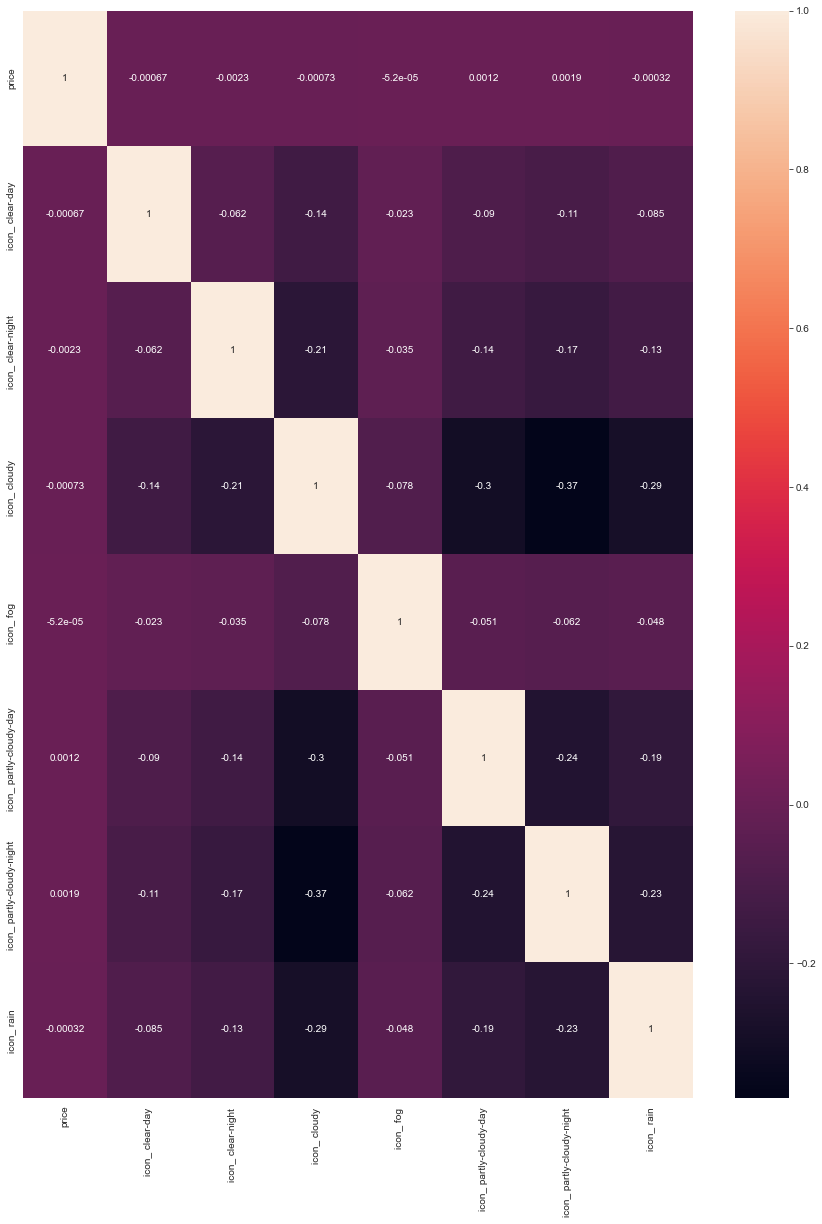

In [53]:
# Menampilkan visualisasi price dengan fitur yang berhubungan dengan icon
plt.figure(figsize=(15, 20))
sns.heatmap(icon_cols.corr(), annot=True)

In [54]:
# Menghapus semua fitur yang berhubungan dengan icon dari dataframe karena mereka memiliki korelasi yang lemah terhadap fitur target (price)
icon_cols = ['icon_ clear-day ', 'icon_ clear-night ', 'icon_ cloudy ', 'icon_ fog ','icon_ partly-cloudy-day ',
            'icon_ partly-cloudy-night ','icon_ rain ']
df = df.drop(icon_cols, axis=1)
print(df.shape)
df.head()

(637976, 19)


,hour,day,month,cab_type,price,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,9,16,12,0,5.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,27,11,0,11.0,0.44,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,28,11,0,7.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,30,11,0,26.0,0.44,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,29,11,0,9.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [55]:
# Memeriksa korelasi berhubungan antara fitur price dan fitur yang memiliki relasi dengan times
times_cols = df[['price','hour', 'day', 'month',]]
times_cols.head()

,price,hour,day,month
0,5.0,9,16,12
1,11.0,2,27,11
2,7.0,1,28,11
3,26.0,4,30,11
4,9.0,3,29,11


<AxesSubplot: >

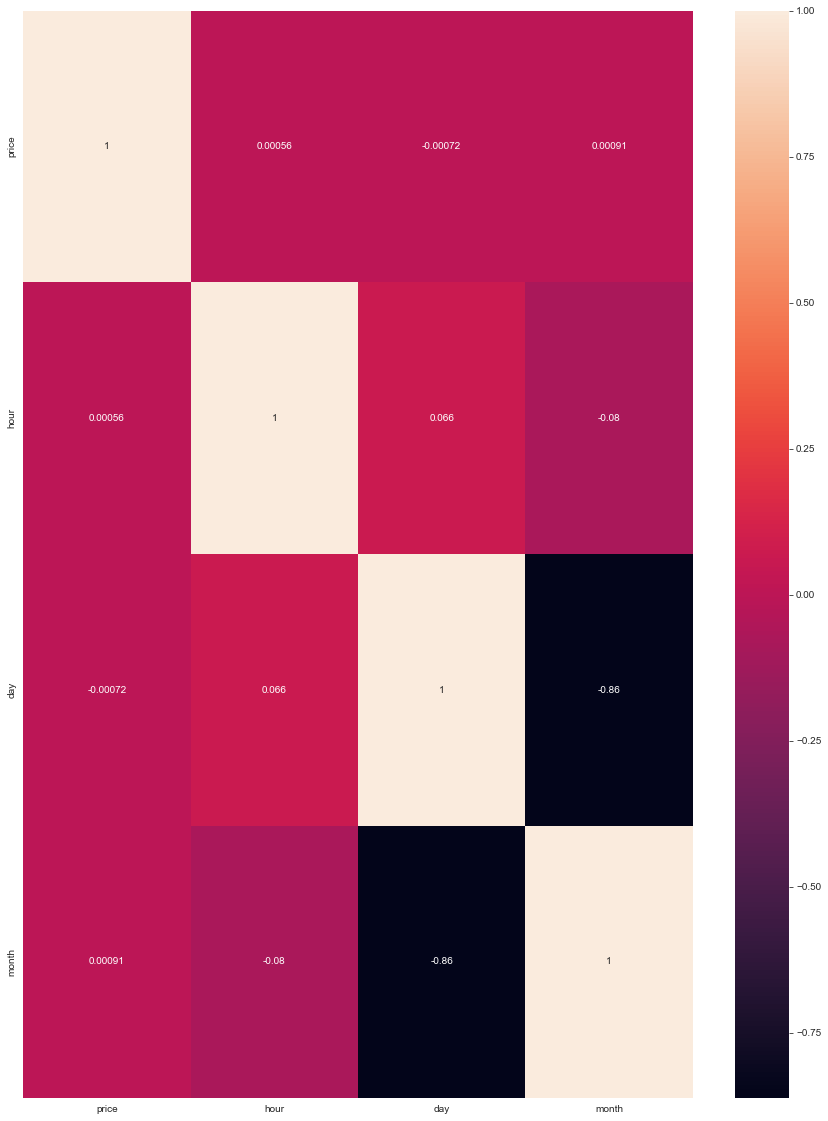

In [56]:
# Menampilkan visualisasi price dengan fitur yang berhubungan dengan times
plt.figure(figsize=(15, 20))
sns.heatmap(times_cols.corr(), annot=True)

In [57]:
# Menghapus semua fitur yang berhubungan dengan times dari dataframe karena mereka memiliki korelasi yang lemah terhadap fitur target (price)
times_cols = ['hour', 'day', 'month']
df = df.drop(times_cols, axis=1)
print(df.shape)
df.head()

(637976, 16)


,cab_type,price,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0,5.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,11.0,0.44,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,7.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,26.0,0.44,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,9.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [58]:
# Mengecek nilai null pada semua fitur
df.isnull().sum()

cab_type             0
price                0
distance             0
surge_multiplier     0
name_Black           0
name_Black SUV       0
name_Lux             0
name_Lux Black       0
name_Lux Black XL    0
name_Lyft            0
name_Lyft XL         0
name_Shared          0
name_UberPool        0
name_UberX           0
name_UberXL          0
name_WAV             0
dtype: int64

Selanjutnya kita kan mengecek nilai minimum dan maximum threshold dan plot kolom price ke dalam boxplot

<AxesSubplot: >

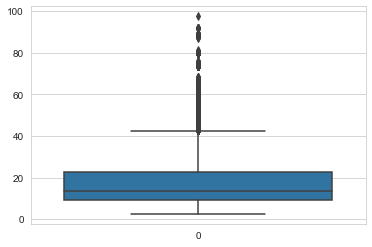

In [59]:
# Melihat apakah ada outlier pada kolom price dengan tampilan visualisasi boxplot
sns.boxplot(df['price'])

Dapat dilihat pada gambar di atas terdapat banyak outlier, maka dari itu kita akan menghapus outlier dengan menggunakan metode IQR (Interquartile Range)

In [60]:
# Print shape lama dari dataset yang belum di handling outliernya
print("Bentuk Shape Lama: ", df.shape)

# IQR
# Kalkulasi batas atas dan bawah
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Membuat array dengan nilai boolean yang menunjukkan baris-baris yang merupakan outlier
upper_array = np.where(df['price']>=upper)[0]
lower_array = np.where(df['price']<=lower)[0]

# Menghapus outlier
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

# Print shape baru dari dataset yang sudah di handling outliernya
print("Bentuk Shape Baru: ", df.shape)

Bentuk Shape Lama:  (637976, 16)
Bentuk Shape Baru:  (632387, 16)


<AxesSubplot: >

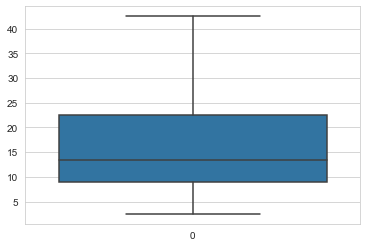

In [61]:
# Melihat apakah ada outlier pada kolom price dengan tampilan visualisasi boxplot
sns.boxplot(df['price'])

Berikutnya kita akan mengecek kecondongan pada semua fitur

<AxesSubplot: >

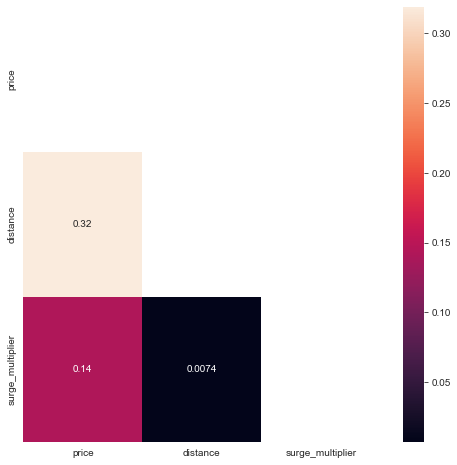

In [62]:
columns = ['price','distance','surge_multiplier']
new_df = df[columns]
plt.figure(figsize=(8,8))
sns.heatmap(new_df.corr(), annot=True, mask=np.triu(new_df.corr()))

Dapat diketahui dari visualisasi di atas bahwa `surge multiplier memiliki nilai skewness yang tinggi dan korelasi yang kurang dengan target (price)`, sedangkan `kolom distance memiliki korelasi yang sangat baik`. Sehingga kita akan menghapus skewness dari surge multiplier menggunakan transformasi BoxCox.

Transformasi Box-Cox merupakan transformasi pangkat pada variabel respons yang dikembangkan oleh Box dan Cox, yang bertujuan untuk menormalkan data, melinearkan model regresi dan menghomogenkan varians.

In [63]:
# Melakukan transformasi Box-Cox pada kolom 'surge_multiplier' dan menggantikan nilai kolom tersebut
df['surge_multiplier'] = stats.boxcox(df['surge_multiplier'])[0]
# Menghitung skewness dari kolom 'surge_multiplier' setelah transformasi
pd.Series(df['surge_multiplier']).skew()


5.64331840785854

Dengan menghitung skewness setelah transformasi Box-Cox, Anda dapat memeriksa sejauh mana transformasi tersebut berhasil mengurangi asimetri dalam data. Jika nilai skewness mendekati nol, itu menunjukkan bahwa transformasi telah berhasil mengubah data menjadi lebih simetris.

In [64]:
df.columns

Index(['cab_type', 'price', 'distance', 'surge_multiplier', 'name_Black',
       'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL',
       'name_Lyft', 'name_Lyft XL', 'name_Shared', 'name_UberPool',
       'name_UberX', 'name_UberXL', 'name_WAV'],
      dtype='object')

In [65]:
df.rename(columns={'name_Black':'Uber Black','name_Black SUV':'Uber Black SUV', 'name_Lux':'Lyft Lux',
                    'name_Lux Black':'Lyft Lux Black','name_Lux Black XL':'Lyft Lux Black XL','name_Lyft':'Lyft',
                    'name_Lyft XL':'Lyft XL', 'name_Shared':'Lyft Shared', 'name_UberPool':'Uber Pool',
                    'name_UberX':'Uber X', 'name_UberXL':'Uber XL', 'name_WAV':'Uber WAV'}, inplace=True)
df.columns

Index(['cab_type', 'price', 'distance', 'surge_multiplier', 'Uber Black',
       'Uber Black SUV', 'Lyft Lux', 'Lyft Lux Black', 'Lyft Lux Black XL',
       'Lyft', 'Lyft XL', 'Lyft Shared', 'Uber Pool', 'Uber X', 'Uber XL',
       'Uber WAV'],
      dtype='object')

In [66]:
# Mengahapus kolom 'cab_type'
df.drop(columns=['cab_type'], inplace=True)
df.head()

,price,distance,surge_multiplier,Uber Black,Uber Black SUV,Lyft Lux,Lyft Lux Black,Lyft Lux Black XL,Lyft,Lyft XL,Lyft Shared,Uber Pool,Uber X,Uber XL,Uber WAV
0,5.0,0.44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,11.0,0.44,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.44,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.44,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [67]:
# Membuat variabel X berisi semua kolom-kolom yang ada kecuali kolom price
X = df.drop(columns = 'price')

# Membuat variabel y berisi kolom price
y = df['price']

In [68]:
# Membuat data latih dan data uji dengan indikasi 30% ke data uji 70% ke data latih 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=5)

## **Pendefinisian Model** 
<hr>
Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model. Akan lebih bagus jika didahului dengan penjelasan mengapa memilih arsitektur atau jenis model tertentu, alasan memilih nilai hyperparameter, dan hal lain yang berkaitan.

In [69]:
# Membuat objek model regresi linear dengan library scikit-learn
model = LinearRegression()

<h2>Linear Regression</h2>

Linear regression merupakan salah satu algoritma yang digunakan pada data science dan tergolong pada algoritma supervised learning. Algoritma ini menggunakan prinsip regresi. Regresi membuat model prediksi untuk target variabel berdasarkan dari variabel bebasnya. Jenis algoritma ini sering digunakan untuk mencari hubungan antara variabel-variabel yang ada dan prediksinya. Sehingga pada linear regression, ditujukan untuk melakukan prediksi pada variabel terikat (y) berdasarkan variabel bebas yang diberikan (x). Hasil akhirnya berupa hubungan linear antara variabel input (x) dengan variabel output(y).

<h2>Alasan Memilih Linear Regression</h2>

Dalam pendefinisian model ini kami menggunakan model Linear Regression untuk memprediksi price. Alasan menggunakan model Linear Regression dikarenakan model ini dapat memberikan hasil yang mudah dipahami dan mudah diinterpretasikan, selanjutnya  kecepatan komputasi yang dimiliki regresi linear relatif cepat dalam memproses dataset yang besar dalam proyek yang kami kerjakan ini serta juga karena memiliki keakuratan yang akurat dan hasil yang memadai.

## **Pelatihan Model** 
<hr>
Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan.

In [70]:
# Melatih machine learning menggunaka data penelitian
model.fit(X_train, y_train)

LinearRegression()

In [71]:
# Melakukan prediksi nilai target y berdasarkan fitur-fitur x pada dataset uji X_test
y_pred = model.predict(X_test)

In [72]:
print(X_test.shape)
print(y_test.shape)
print(y_pred.shape)

(189717, 14)
(189717,)
(189717,)


## **Evaluasi Model** 
<hr>
Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Jika memilih untuk melakukan model deployment, lanjut ke poin dibawah. Jika tidak, lanjut ke poin 5 dan 6.

In [73]:
# Menghitung MAE
print(f'MAE dari model Linear Regression adalah {mean_absolute_error(y_test, y_pred)}')

# Menghitung MAPE
print(f'MAPE dari model Linear Regression adalah {mean_absolute_percentage_error(y_test, y_pred)}')

# Menghitung R2
print(f'R2 dari model Linear Regression adalah {r2_score(y_test, y_pred)}')

# Menghitung MSE
print(f'MSE dari model Linear Regression adalah {mean_squared_error(y_test, y_pred)}')

# Menghitung RMSE
print(f'RMSE dari model Linear Regression adalah {np.sqrt(mean_squared_error(y_test, y_pred))}')

MAE dari model Linear Regression adalah 1.6965074230607842
MAPE dari model Linear Regression adalah 0.13074358991836188
R2 dari model Linear Regression adalah 0.9308897979924544
MSE dari model Linear Regression adalah 5.332181303343687
RMSE dari model Linear Regression adalah 2.3091516414786812


## **Model Inference** 
<hr>
Bagian ini diisi dengan model inference, di mana model yang sudah kita latih akan dicoba pada data selain data yang sudah tersedia. Data yang dimaksud bisa berupa data buatan oleh student, ataupun data yang ada pada internet.

### Percobaan 1

In [74]:
# Membuat salinan dari dataset yang ada dan menyimpan di variabel baru X_to_test
X_to_test = df.copy()

In [75]:
# Menghitung jumlah missing value pada dataset X_to_test
X_to_test.isna().sum()

price                0
distance             0
surge_multiplier     0
Uber Black           0
Uber Black SUV       0
Lyft Lux             0
Lyft Lux Black       0
Lyft Lux Black XL    0
Lyft                 0
Lyft XL              0
Lyft Shared          0
Uber Pool            0
Uber X               0
Uber XL              0
Uber WAV             0
dtype: int64

In [76]:
# Menampilkan 10 data teratas pada dataset X_to_test
X_to_test.head(10)

,price,distance,surge_multiplier,Uber Black,Uber Black SUV,Lyft Lux,Lyft Lux Black,Lyft Lux Black XL,Lyft,Lyft XL,Lyft Shared,Uber Pool,Uber X,Uber XL,Uber WAV
0,5.0,0.44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,11.0,0.44,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.44,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.44,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,16.5,0.44,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,10.5,1.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,16.5,1.08,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3.0,1.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,27.5,1.08,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
# Dictionary berisi value attribut yang akan digunakan untuk inferensi atau prediksi
to_inference = {'Lyft XL' : [1, 0],
                'Uber XL' : [0, 1],
                'distance' : [2.94, 2.94],
                'surge_multiplier' : [0.0, 0.0]}

In [78]:
# Membuat Dataset dari dicionary to_inference
pd.DataFrame(to_inference)

,Lyft XL,Uber XL,distance,surge_multiplier
0,1,0,2.94,0.0
1,0,1,2.94,0.0


In [79]:
# Menggabungkan dataset X_to_test dengan dataset dictionary to_inference
X_to_test = pd.concat([X_to_test, pd.DataFrame(to_inference)], ignore_index = True)

In [80]:
# Menampilkan dataset X_to_test
X_to_test

,price,distance,surge_multiplier,Uber Black,Uber Black SUV,Lyft Lux,Lyft Lux Black,Lyft Lux Black XL,Lyft,Lyft XL,Lyft Shared,Uber Pool,Uber X,Uber XL,Uber WAV
0,5.0,0.44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,11.0,0.44,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.44,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.44,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632384,9.5,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
632385,27.0,1.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
632386,10.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
632387,NaN,2.94,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN


In [81]:
# Menereapkan one hot encoding variabel kategorikal ke numerik pada dataset X_to_test
X_to_test = pd.get_dummies(X_to_test)

# Memilih dua baris terakhir dari dataset X_to_test
X_to_test = X_to_test[-2:]

# Menampilkan dataset X_to_test
X_to_test

,price,distance,surge_multiplier,Uber Black,Uber Black SUV,Lyft Lux,Lyft Lux Black,Lyft Lux Black XL,Lyft,Lyft XL,Lyft Shared,Uber Pool,Uber X,Uber XL,Uber WAV
632387,NaN,2.94,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN
632388,NaN,2.94,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN


In [82]:
# Mengganti nilai missing value dengan 0
X_to_test.fillna(0,  inplace=True)

In [83]:
# Drop kolom price pada dataset X_to_test
X_to_test = X_to_test.drop(columns = 'price')

In [84]:
# Menampilkan dataset X_to_test
X_to_test

,distance,surge_multiplier,Uber Black,Uber Black SUV,Lyft Lux,Lyft Lux Black,Lyft Lux Black XL,Lyft,Lyft XL,Lyft Shared,Uber Pool,Uber X,Uber XL,Uber WAV
632387,2.94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
632388,2.94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [85]:
# Memprediksi nilai price menggunakan model yang telah dilatih sebelumnya
price = model.predict(X_to_test)

In [86]:
# Menampilkan hasil prediksi price perbandingan harga Uber tipe UberXL dan Lyft tipe Lyft XL dengan distance keduanya 1 dan surge_multiplier 1
price

array([16.78826904, 17.65041351])

Pada baris code di atas kita mencoba untuk melakukan prediksi dengan, ketentuan sebagai berikut :
1. Name Cab = **Lyft XL**
2. Distance = **2.94**
3. Tidak ada kelipatan pengguna (surge_multiplier)

Dapat diketahui price atau tarif yang dihasilkan yaitu sebesar `16.78`

Pada baris code di atas kita mencoba untuk melakukan prediksi dengan, ketentuan sebagai berikut :
1. Name Cab = **Uber XL**
2. Distance = **2.94**
3. Tidak ada kelipatan pengguna (surge_multiplier)

Dapat diketahui price atau tarif yang dihasilkan yaitu sebesar `17.65`

### Percobaan 2

In [87]:
def X_predict_price(name_cab, distance, surge_multiplier):
    loc_index = np.where(X.columns==name_cab)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = distance
    x[1] = surge_multiplier
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

In [88]:
X_predict_price('Lyft XL', 2.94, 0.0)

16.78826904296875

Pada baris code di atas kita mencoba untuk melakukan prediksi dengan, ketentuan sebagai berikut :
1. Name Cab = **Lyft XL**
2. Distance = **2.94**
3. Tidak ada kelipatan pengguna (surge_multiplier)

Dapat diketahui price atau tarif yang dihasilkan yaitu sebesar `16.78`

In [89]:
X_predict_price('Uber XL', 2.94, 0.0)

17.650413513183594

Pada baris code di atas kita mencoba untuk melakukan prediksi dengan, ketentuan sebagai berikut :
1. Name Cab = **Uber XL**
2. Distance = **2.94**
3. Tidak ada kelipatan pengguna (surge_multiplier)

Dapat diketahui price atau tarif yang dihasilkan yaitu sebesar `17.65`

## **Pengambilan Kesimpulan** 
<hr>
Pada bab terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan dibandingkan dengan objective yang sudah ditulis di bagian pengenalan.

1. Dataset yang digunakan dalam proyek ini adalah "Uber and Lyft Dataset Boston, MA" yang terdiri dari 693071 baris dan 57 kolom. Didalamnya berisi informasi perjalanan rideshare yang dilakukan di Boston, Massachusetts, Amerika Serikat. Dari begitu banyaknya fitur perlu diketahui fitur mana saja yang memiliki korelasi yang cukup, hal itu sangat berguna ketika dalam proses prediksi, dikarenakan `tujuan utama dalam projek ini adalah untuk memprediksi harga maka fitur price` merupakan variabel dependent yang akan menjadi predictand. Maka dari itu dilakukan analisis dengan menggunakan fungsi korelasi dan heatmap plot dari 57 fitur kami mengambil fitur **distance, surge_multiplier dan name_cab** karena fitur-fitur tersebut memiliki korelasi yang cukup berpengaruh ke variabel dependent (**price**).

2. Pada section EDA bisa dilihat, bahwa :
    * Berdasarkan grafik lingkaran, diketahui bahwa persentase pemesanan jenis kendaraan Uber lebih besar daripada Lyft (52%).
    * Berdasarkan histogram, diketahui bahwa tingkat distribusi harga mencapai frekuensi tertinggi (100.000) pada rentang price 5-10 dolar.
    * Top 5 source-destination pada cab jenis uber dan lyft memeliki kemiripan, yaitu : Financial District-South Station (dan sebaliknya), Back Bay-North End (dan sebaliknya), West End-Fenway.

3. Hasil analisis Linier Regression :
   * Rata-rata kesalahan mutlak (MAE) dari model Linear Regression adalah 1.6965074230607842 atau dibulatkan menjadi 1,70.
   * Rata-rata persentase kesalahan mutlak (MAPE) dari model Linear Regression adalah 0.13074358991836188 atau dibulatkan 
     menjadi 0,13.
   * `Nilai R-squared (R2) dari model Linear Regression adalah 0.9308897979924544 atau dibulatkan menjadi 0,93.`
   * Rata-rata kuadrat kesalahan (MSE) dari model Linear Regression adalah 5.332181303343687 atau dibulatkan menjadi 5,3.
   * Penyimpangan rata-rata kuadrat (RMSE) dari model Linear Regression adalah 2.3091516414786812 atau dibulatkan menjadi 2,3.

    R2 score merupakan salah satu metode yang digunakan untuk mengukur performa evaluasi pada regression. Hasil prediksi diatas dapat dilihat bahwa model prediksi menghasilkan nilai sebesar `0.93 atau 93% yang mana hasil tersebut menunjukkan nilai prediksi yang baik`.

4. `Model telah berhasil digunakan untuk memprediksi dengan 2 algortima percobaan berbeda`. Pada percobaan algortima 1 dan 2 telah berhasil memprediksi price dengan tipe `Lyft XL` dan `Uber XL` dengan `distance 2.94 dan surge multiplier 0` menghasilkan price sebesar `16.78 dan 17.65`.